In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN

In [38]:

gan = GAN(100, 0.1)
gan.dist_init('mu', 0, 5)
gan.data_init(1000, 3)
gan.model_init()
gan.optimizer_init(1, 1.5, 0.9, 1e-5, 3e-5, 5, 1, True, 0.1)
gan.fit(100, 1e-7, True)

100%|██████████| 100/100 [06:29<00:00,  3.89s/it]


(-1.5, 1.5)

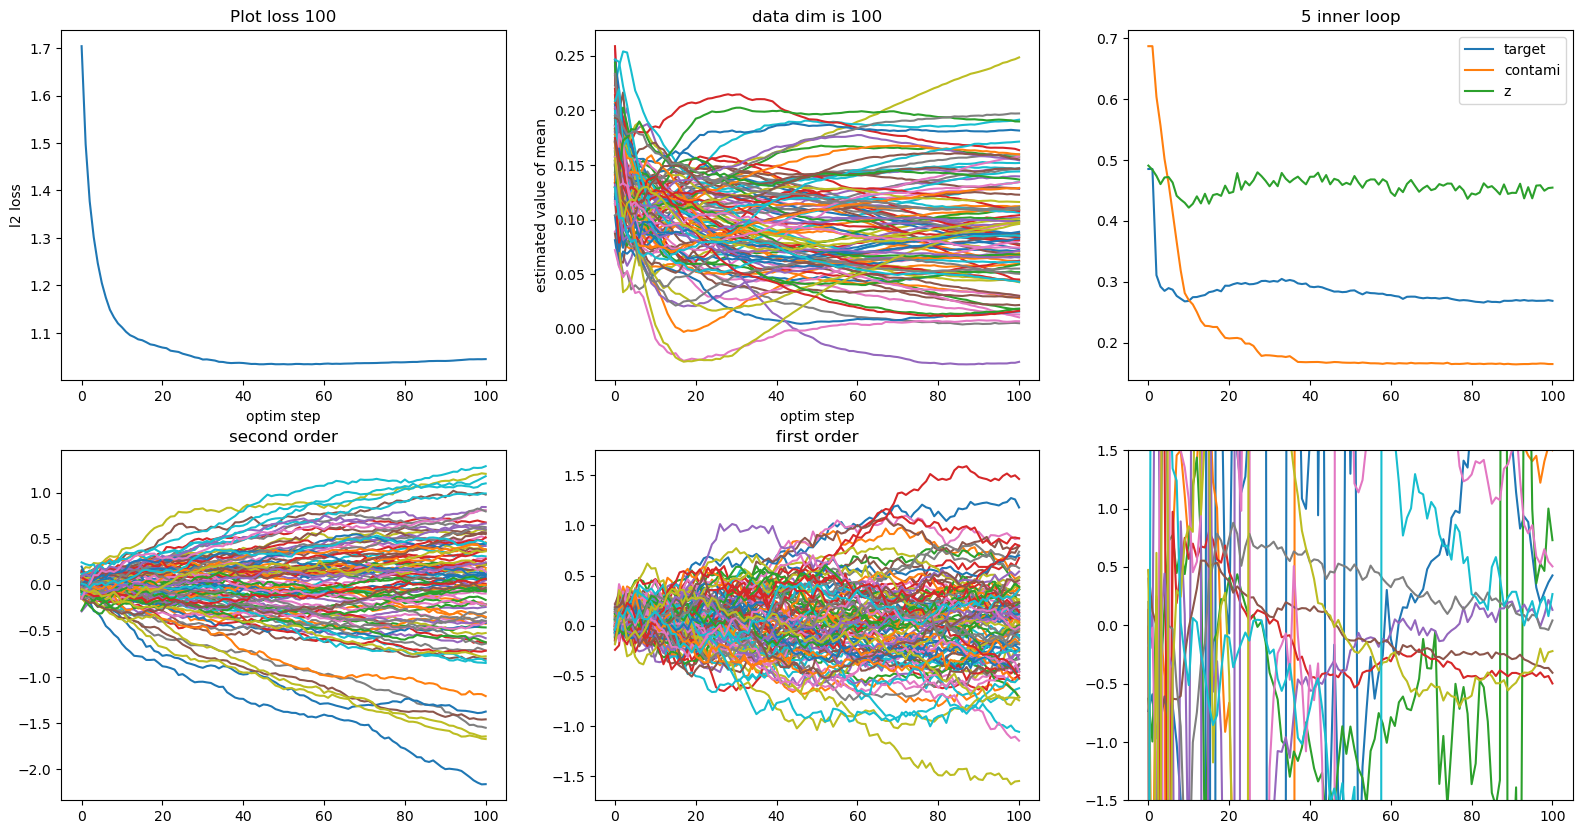

In [39]:
col_num = 3
row_num = 2
plt.figure(figsize=(6.5 * col_num, 5 * row_num))
plt.subplot(row_num, col_num, 1)
plt.plot(gan.l2_loss)
plt.xlabel('optim step')
plt.ylabel('l2 loss')
plt.title(f'Plot loss {gan.data_dim}')
plt.subplot(row_num, col_num, 2)
# for mean in gan.emperical_true_mean:
#     plt.hlines(mean, 0, gan.optim_iter, colors='r', lw=1)
plt.plot(np.array(gan.G_record))
plt.xlabel('optim step')
plt.ylabel('estimated value of mean')
plt.title(f'data dim is {gan.data_dim}')
# plt.legend()
plt.subplot(row_num, col_num, 3)
plt.plot(gan.D_data_record, label='target')
plt.plot(gan.D_contami_record,label='contami')
plt.plot(gan.D_z_record, label='z')
plt.title(f'{gan.update_D_iter} inner loop')
plt.legend()

plt.subplot(row_num, col_num, 4)
plt.plot(np.array(gan.D_record)[:,:gan.data_dim]);
plt.title('second order')
plt.subplot(row_num, col_num, 5)
plt.plot(np.array(gan.D_record)[:,gan.data_dim:]);
plt.title('first order')
D_rec = np.array(gan.D_record)
plt.subplot(row_num, col_num, 6)
vertex = - 0.5 * D_rec[:, gan.data_dim:] / D_rec[:, :gan.data_dim]
vertex = vertex[:, :10]
plt.plot(vertex)
plt.ylim(-1.5, 1.5)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN

In [10]:
optim_iter = 500
# gan = GAN(2, 0.1)
# gan.dist_init('sigma', 0, 5, sigma_setting='ar')
# gan.data_init(10000, 3)
# gan.model_init(D_init_option='random', G_init_option='kendall')
# gan.optimizer_init(0, 0.1, 0.95, 1e-4, 1e-4,
#                     update_D_iter=1, is_mm_alg=False)
# gan.fit(optim_iter)
# plt.plot(np.array(gan.objective), label=f'{gan.data_dim}')
# plt.xlabel('optim step')
# plt.ylabel('objective')
# plt.title(f'data dim is {gan.data_dim}')
for i in range(3):
    gan = GAN(10, 0.1)
    gan.dist_init('sigma', 0, 5, sigma_setting='ar')
    gan.data_init(1000, 3)
    gan.model_init(D_init_option='random', G_init_option='kendall')
    # gan.optimizer_init(1, 1, 0.35, 1e-4, 1e-4,
                        # update_D_iter=1, is_mm_alg=False)
    gan.optimizer_init(1, 1, 0.35, 1e-3, 1e-4,
                        update_D_iter=1, is_mm_alg=False)
    gan.fit(optim_iter, verbose=True)
    gan.plot()

100%|██████████| 500/500 [00:08<00:00, 60.67it/s]


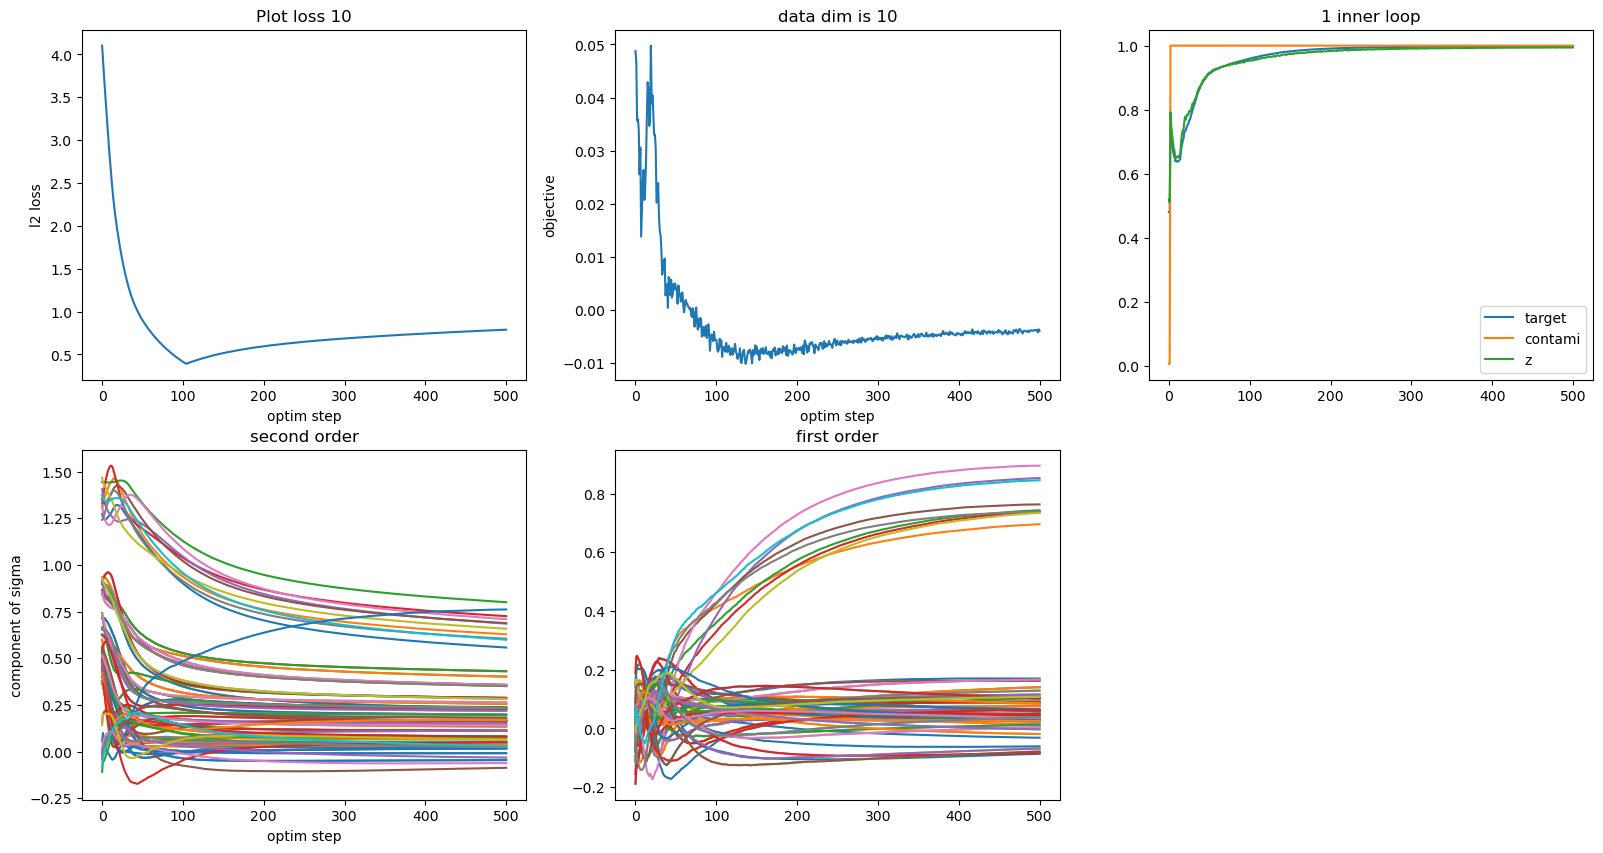

In [12]:
col_num = 3
row_num = 2
plt.figure(figsize=(6.5 * col_num, 5 * row_num))
plt.subplot(row_num, col_num, 1)
plt.plot(gan.l2_loss)
plt.xlabel('optim step')
plt.ylabel('l2 loss')
plt.title(f'Plot loss {gan.data_dim}')
plt.subplot(row_num, col_num, 2)
# for mean in gan.emperical_true_mean:
# #     plt.hlines(mean, 0, gan.optim_iter, colors='r', lw=1)
plt.plot(np.array(gan.objective))
plt.xlabel('optim step')
plt.ylabel('objective')
plt.title(f'data dim is {gan.data_dim}')
# plt.legend()
plt.subplot(row_num, col_num, 3)
plt.plot(gan.D_data_record, label='target')
plt.plot(gan.D_contami_record,label='contami')
plt.plot(gan.D_z_record, label='z')
plt.title(f'{gan.update_D_iter} inner loop')
plt.legend()

plt.subplot(row_num, col_num, 4)
plt.plot(np.array(gan.G_record).reshape((len(gan.G_record)), gan.data_dim ** 2))
plt.xlabel('optim step')
plt.ylabel('component of sigma')
plt.title(f'data dim is {gan.data_dim}')

plt.subplot(row_num, col_num, 4)
plt.plot(np.array(gan.D_record)[:,:gan.data_dim]);
plt.title('second order')
plt.subplot(row_num, col_num, 5)
plt.plot(np.array(gan.D_record)[:,gan.data_dim:]);
plt.title('first order')


100%|██████████| 200/200 [01:47<00:00,  1.87it/s]


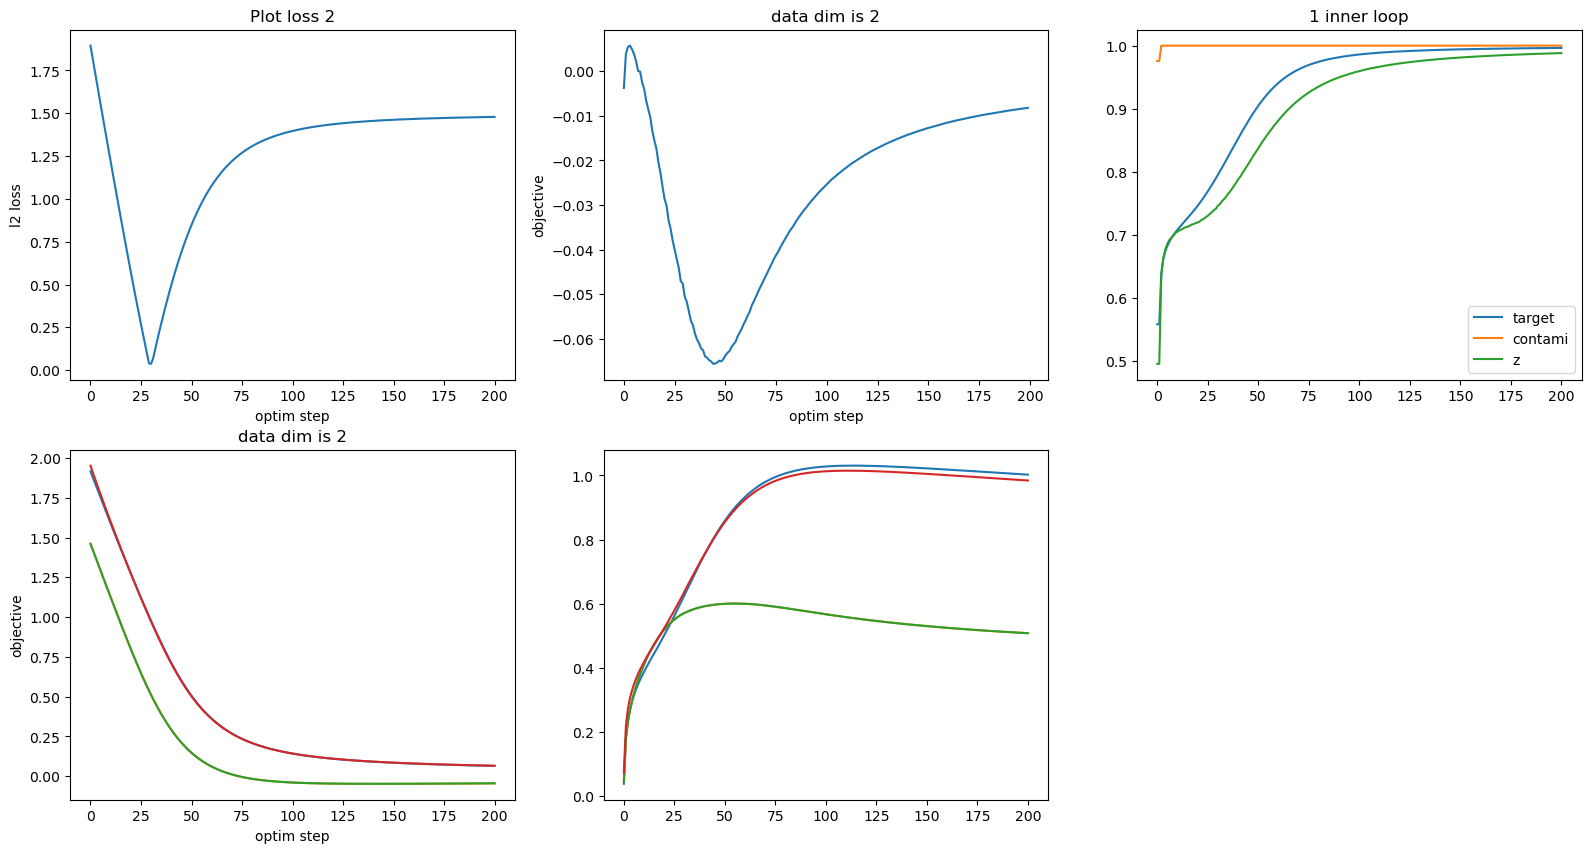

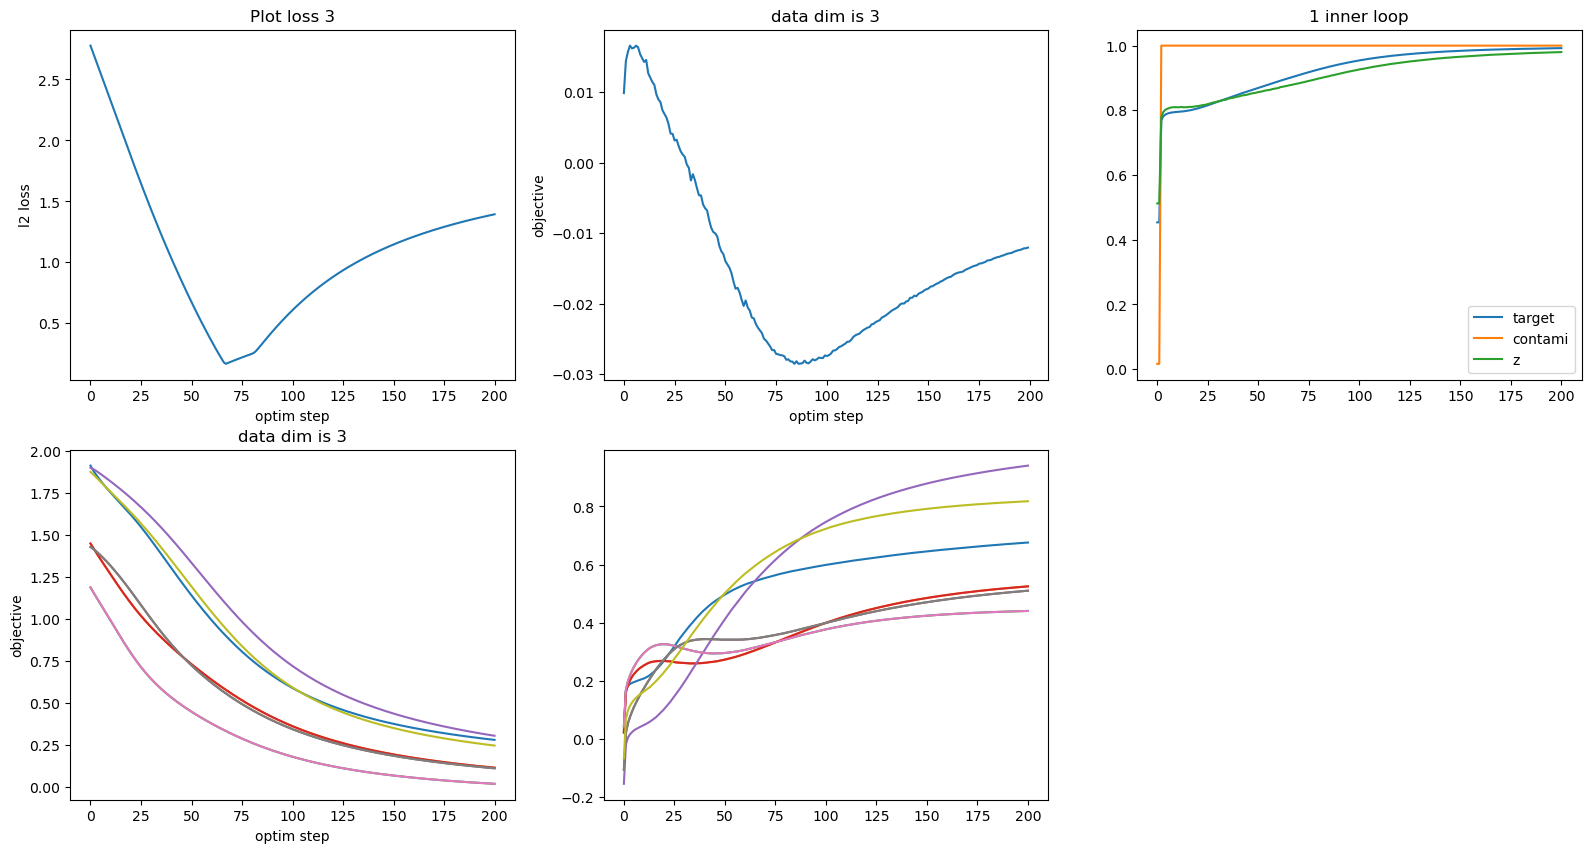

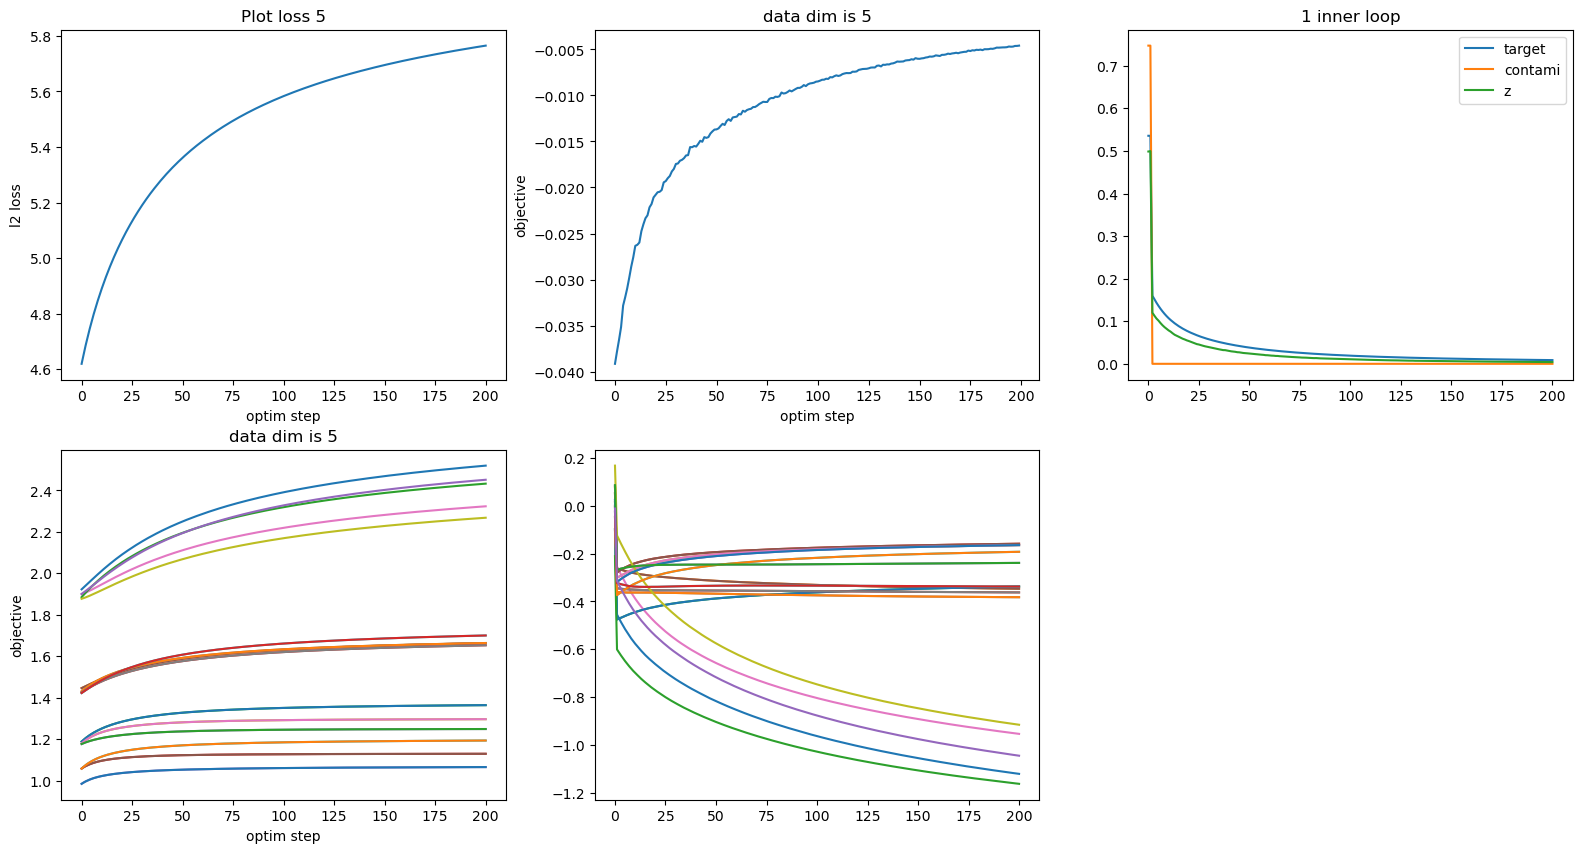

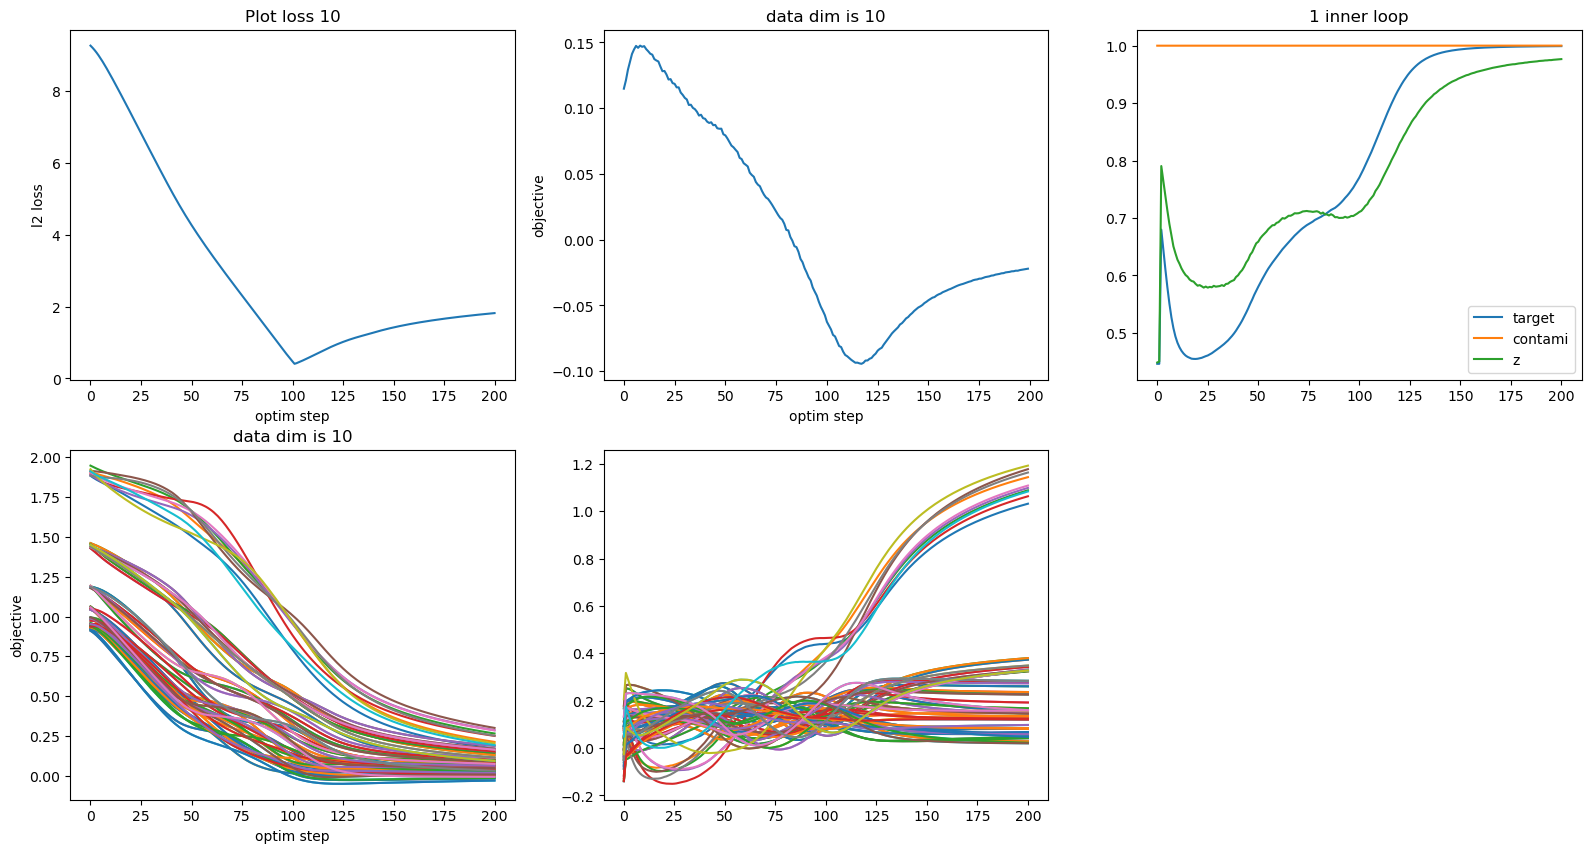

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from gan import gan as GAN
from tqdm import tqdm

dim = [2, 3, 5, 10]
for p in dim:
    gan = GAN(p, 0.2)
    gan.dist_init('sigma', 0, 5, sigma_setting='ar')
    gan.data_init(50000, 3)
    gan.model_init(D_init_option='random', G_init_option='kendall')
    # gan.D *= 0.3
    gan.optimizer_init(1, 3e-1, 0.0, 1e-5, 1e-4,
                        update_D_iter=1, is_mm_alg=False)
    gan.fit(200, verbose=True)
    col_num = 3
    row_num = 2
    plt.figure(figsize=(6.5 * col_num, 5 * row_num))
    plt.subplot(row_num, col_num, 1)
    plt.plot(gan.l2_loss)
    plt.xlabel('optim step')
    plt.ylabel('l2 loss')
    plt.title(f'Plot loss {gan.data_dim}')
    plt.subplot(row_num, col_num, 2)
    # for mean in gan.emperical_true_mean:
    # #     plt.hlines(mean, 0, gan.optim_iter, colors='r', lw=1)
    plt.plot(np.array(gan.objective))
    plt.xlabel('optim step')
    plt.ylabel('objective')
    plt.title(f'data dim is {gan.data_dim}')
    # plt.legend()
    plt.subplot(row_num, col_num, 3)
    plt.plot(gan.D_data_record, label='target')
    plt.plot(gan.D_contami_record,label='contami')
    plt.plot(gan.D_z_record, label='z')
    plt.title(f'{gan.update_D_iter} inner loop')
    plt.legend()

    plt.subplot(row_num, col_num, 4)
    plt.plot(np.array(gan.G_record).reshape((len(gan.G_record)), gan.data_dim ** 2))
    plt.xlabel('optim step')
    plt.ylabel('objective')
    plt.title(f'data dim is {gan.data_dim}')
    plt.subplot(row_num, col_num, 5)
    plt.plot(gan.D_record)

In [ ]:
from gan import gan as GAN
gan = GAN(100, 0.1)
gan.dist_init('mu', 0, 5)
gan.data_init(1000, 3)
gan.model_init()
gan.optimizer_init(1, 0.5, 0.95, 1e-3, 3e-5, 1, 1, False, 0.1)
gan.fit(10000, 1e-7, True)